## Marketing Subscription Prediction

### Problem:
XYZ is one of the major banks in USA. XYZ intends to increase its client base by using customer retention and finding ways to bring in new clients in ways that are effective. Analysts and Data Engineers have managed to scramble together a dataset that contains the past data of clients and whether they have purchased a subscription or not. Use the data to identify if it can be justified spending on customer retention over advertising on bringing new clients.

# 

### Solution:
1. [Data Collection](#1-data-collection)
2. [Data Validation](#2-data-validation)
3. [Exploratory Data Analysis](#3-exploratory-data-analysis-eda)
4. [Feature Extraction and Data Preprocessing](#4-feature-extraction-and-data-preprocessing)
5. [Model Building](#5-model-building)
6. [Tuning Hyperparameters]
7. [Model Deployment and Reiteration](#7-model-deployment-and-reiteration)
8. [Results]

# 

# 1. Data Collection

Let's import the given data and try to understand what we are supposed to work with

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Bank client data:

- Age (numeric)
- Job: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- Education: (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

### Related with the last contact of the current campaign:

- Contact: contact communication type (categorical: 'cellular', 'telephone')
- Month: last contact month of the year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- Day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
- Duration: last contact duration, in seconds (numeric). 
> Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes:

- Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- Previous: number of contacts performed before this campaign and for this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

### Social and economic context attributes:

- Emp.var.rate: employment variation rate - quarterly indicator (numeric)
- Cons.price.idx: consumer price index - monthly indicator (numeric)
- Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- Euribor3m: euribor 3 month rate - daily indicator (numeric)
- Nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes', 'no')


# 

# 2. Data Validation

Now let's check whether the given data is complete.

<Axes: >

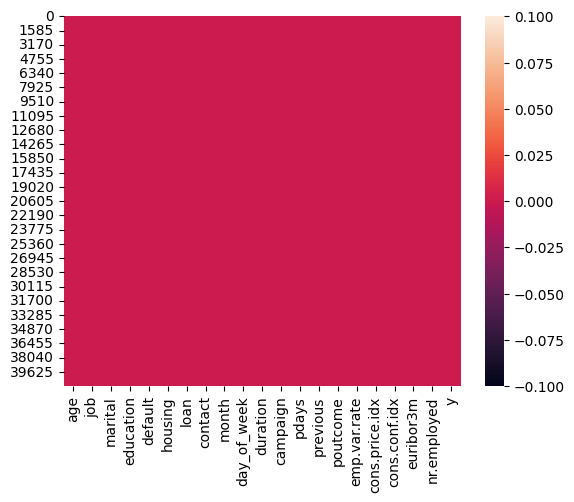

In [27]:
sns.heatmap(df.isnull())

In [37]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

It appears that the data is complete and given the circumstances let's assume that the data is also valid

# 

# 3. Exploratory Data Analysis (EDA)

# 

# 4. Feature Extraction and Data Preprocessing
Now let's prepare the data for model building. It is currently in a format that cannot be understood by a machine learning model.

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df['job']      = labelencoder_X.fit_transform(df['job']) 
df['marital']  = labelencoder_X.fit_transform(df['marital']) 
df['education']= labelencoder_X.fit_transform(df['education']) 
df['default']  = labelencoder_X.fit_transform(df['default']) 
df['housing']  = labelencoder_X.fit_transform(df['housing']) 
df['loan']     = labelencoder_X.fit_transform(df['loan']) 

In [8]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,3,7,1,3,1,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,7,1,3,0,2,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,7,1,3,0,0,2,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,2,1,1,5,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,3,5,1,6,0,2,0,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,2,9,1,5,0,0,0,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [9]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df['contact']     = labelencoder_X.fit_transform(df['contact']) 
df['month']       = labelencoder_X.fit_transform(df['month']) 
df['day_of_week'] = labelencoder_X.fit_transform(df['day_of_week']) 

In [10]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data

duration(df);

In [11]:
df['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [12]:
bank_final= df.copy()
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 20)

In [13]:
from sklearn.model_selection import train_test_split

y = df['y'].apply(lambda x: 0 if x == 'no' else 1)
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# 5. Model Building

In [15]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7106  173]
 [ 619  340]]
90.0


k=1 87.96 (+/- 0.38)
k=2 89.52 (+/- 0.48)
k=3 89.57 (+/- 0.54)
k=4 89.99 (+/- 0.55)
k=5 90.03 (+/- 0.53)
k=6 90.23 (+/- 0.49)
k=7 90.26 (+/- 0.55)
k=8 90.31 (+/- 0.56)
k=9 90.39 (+/- 0.57)
k=10 90.38 (+/- 0.60)
k=11 90.45 (+/- 0.54)
k=12 90.39 (+/- 0.54)
k=13 90.49 (+/- 0.49)
k=14 90.45 (+/- 0.54)
k=15 90.53 (+/- 0.46)
k=16 90.42 (+/- 0.55)
k=17 90.43 (+/- 0.53)
k=18 90.44 (+/- 0.53)
k=19 90.49 (+/- 0.52)
k=20 90.43 (+/- 0.54)
k=21 90.49 (+/- 0.51)
k=22 90.45 (+/- 0.47)
k=23 90.52 (+/- 0.43)
k=24 90.43 (+/- 0.45)
k=25 90.47 (+/- 0.42)
The optimal number of neighbors is 14 with 90.5%


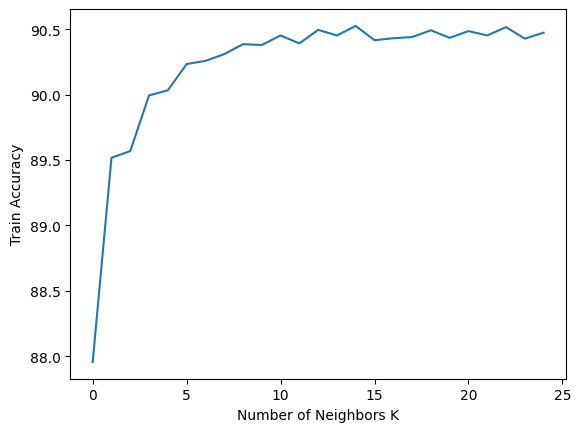

In [16]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7162  117]
 [ 704  255]]
90.0


In [18]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6719  560]
 [ 605  354]]
86.0


In [19]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6814  465]
 [ 495  464]]
88.0


In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6984  295]
 [ 505  454]]
90.0


In [21]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6451  828]
 [ 433  526]]
85.0


In [22]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[6995  284]
 [ 496  463]]
91.0


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7023  256]
 [ 487  472]]
91.0


# 7. Model Deployment and Reiteration

In [24]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
7,Gradient Boosting,0.914203
6,XGBoost,0.910744
4,Logistic Model,0.909772
0,Random Forest Classifier,0.909439
3,K-Near Neighbors,0.905281
1,Decision Tree Classifier,0.884917
2,Support Vector Machine,0.856055
5,Gausian NB,0.845038


In [26]:
import pickle

with open("model.pkl","wb") as f:
    pickle.dump(gbk,f)